In [372]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler




In [413]:
url_string = 'C:\\Users\\USER\\Documents\\Parkinson-s-DiseaseML\\dataset .csv'
df = pd.read_csv(url_string)

In [414]:
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992000,157.302000,74.997000,0.007840,0.000070,0.003700,0.005540,0.011090,0.043740,...,0.065450,0.022110,21.033000,1.000000,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400000,148.650000,113.819000,0.009680,0.000080,0.004650,0.006960,0.013940,0.061340,...,0.094030,0.019290,19.085000,1.000000,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682000,131.111000,111.555000,0.010500,0.000090,0.005440,0.007810,0.016330,0.052330,...,0.082700,0.013090,20.651000,1.000000,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676000,137.871000,111.366000,0.009970,0.000090,0.005020,0.006980,0.015050,0.054920,...,0.087710,0.013530,20.644000,1.000000,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014000,141.781000,110.655000,0.012840,0.000110,0.006550,0.009080,0.019660,0.064250,...,0.104700,0.017670,19.649000,1.000000,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,synth_7756,151.028206,179.206312,118.797466,0.006594,0.000040,0.003458,0.003513,0.008731,0.027186,...,0.050788,0.021377,21.884979,0.736271,0.499528,0.727604,-5.772439,0.234236,2.392305,0.210778
1191,synth_5355,161.752472,211.299774,114.784598,0.006397,0.000045,0.003545,0.003017,0.009591,0.028982,...,0.049785,0.020925,21.973752,0.798377,0.499209,0.728558,-5.604039,0.235680,2.362850,0.209570
1192,synth_6356,148.323186,194.399282,118.570170,0.006335,0.000044,0.003483,0.003386,0.008980,0.029598,...,0.051215,0.021530,21.615298,0.771907,0.497459,0.717687,-5.770640,0.233789,2.410545,0.223595
1193,synth_7098,152.106305,209.880095,112.903699,0.005298,0.000041,0.002778,0.003506,0.009388,0.029550,...,0.049023,0.026806,21.561977,0.704315,0.486495,0.722529,-5.677169,0.236918,2.427505,0.218734


In [415]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1.0,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1.0,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1.0,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1.0,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1.0,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [376]:
df.shape

(1195, 24)

In [416]:
df.columns.unique()

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195 entries, 0 to 1194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1195 non-null   object 
 1   MDVP:Fo(Hz)       1195 non-null   float64
 2   MDVP:Fhi(Hz)      1195 non-null   float64
 3   MDVP:Flo(Hz)      1195 non-null   float64
 4   MDVP:Jitter(%)    1195 non-null   float64
 5   MDVP:Jitter(Abs)  1195 non-null   float64
 6   MDVP:RAP          1195 non-null   float64
 7   MDVP:PPQ          1195 non-null   float64
 8   Jitter:DDP        1195 non-null   float64
 9   MDVP:Shimmer      1195 non-null   float64
 10  MDVP:Shimmer(dB)  1195 non-null   float64
 11  Shimmer:APQ3      1195 non-null   float64
 12  Shimmer:APQ5      1195 non-null   float64
 13  MDVP:APQ          1195 non-null   float64
 14  Shimmer:DDA       1195 non-null   float64
 15  NHR               1195 non-null   float64
 16  HNR               1195 non-null   float64


In [418]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,...,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000
mean,154.312848,197.246916,116.332971,0.006221,0.000044,0.003306,0.003428,0.009920,0.029671,0.282587,...,0.047084,0.024880,21.895992,0.754117,0.498054,0.718214,-5.683541,0.226451,2.382126,0.206771
std,17.124313,37.804828,17.953210,0.002001,0.000014,0.001228,0.001140,0.003678,0.007781,0.080554,...,0.012609,0.016717,1.829752,0.178176,0.043021,0.022905,0.451130,0.034527,0.157783,0.037229
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,150.616420,189.666263,112.204966,0.005769,0.000041,0.003012,0.003173,0.009089,0.027992,0.264388,...,0.044325,0.020837,21.550002,0.726172,0.489091,0.713742,-5.779205,0.219263,2.351569,0.199061
50%,154.117666,197.198334,116.100612,0.006188,0.000044,0.003282,0.003397,0.009845,0.029575,0.280555,...,0.046820,0.024486,21.913050,0.758665,0.497781,0.718387,-5.681992,0.226621,2.382482,0.207056
75%,157.491303,204.071906,119.290367,0.006557,0.000046,0.003530,0.003618,0.010552,0.031008,0.296840,...,0.049418,0.027661,22.274815,0.797437,0.506417,0.722957,-5.595197,0.232901,2.411210,0.213564
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [422]:
df.duplicated().sum()

0

In [423]:
df['status'].value_counts()

status
1.000000    147
0.000000     48
0.753214      1
0.758071      1
0.743590      1
           ... 
0.790818      1
0.740938      1
0.758922      1
0.722024      1
0.735387      1
Name: count, Length: 1002, dtype: int64

In [424]:
df['status']=df['status'].apply(lambda x:1 if x>0.4 else 0)

In [426]:
df['status'].value_counts()

status
1    1147
0      48
Name: count, dtype: int64

In [427]:
df.drop(columns=['name'],inplace=True)

In [428]:
corr_matrix=df.corr().abs()
corr_matrix

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.383640,0.565684,0.111444,0.364325,0.073053,0.107580,0.074204,0.089965,0.068720,...,0.091028,0.021772,0.054107,0.330148,0.360960,0.425096,0.393746,0.234647,0.170243,0.354341
MDVP:Fhi(Hz),0.383640,1.000000,0.080958,0.099646,0.027379,0.093518,0.085701,0.091633,0.004489,0.041817,...,0.005908,0.155815,0.022760,0.142860,0.107342,0.327855,0.074417,0.004155,0.168256,0.069366
MDVP:Flo(Hz),0.565684,0.080958,1.000000,0.133817,0.263978,0.098471,0.092900,0.095268,0.135160,0.112663,...,0.144475,0.103138,0.201277,0.329147,0.378824,0.049169,0.376011,0.230752,0.096611,0.323359
MDVP:Jitter(%),0.111444,0.099646,0.133817,1.000000,0.889967,0.939107,0.929486,0.944890,0.733402,0.764654,...,0.708603,0.861993,0.694637,0.240830,0.343214,0.091766,0.658766,0.366649,0.414101,0.687969
MDVP:Jitter(Abs),0.364325,0.027379,0.263978,0.889967,1.000000,0.874871,0.851464,0.875391,0.671087,0.679452,...,0.662620,0.795974,0.625015,0.290963,0.418693,0.167321,0.700468,0.367610,0.296709,0.711529
MDVP:RAP,0.073053,0.093518,0.098471,0.939107,0.874871,1.000000,0.913340,0.948869,0.723000,0.751143,...,0.707357,0.872332,0.682367,0.230062,0.326062,0.060617,0.614596,0.308560,0.407739,0.635431
MDVP:PPQ,0.107580,0.085701,0.092900,0.929486,0.851464,0.913340,1.000000,0.912047,0.759861,0.802617,...,0.725064,0.805661,0.696961,0.246296,0.315475,0.189675,0.680993,0.385507,0.391739,0.730470
Jitter:DDP,0.074204,0.091633,0.095268,0.944890,0.875391,0.948869,0.912047,1.000000,0.723452,0.752393,...,0.706533,0.872243,0.686845,0.230593,0.327158,0.059879,0.615461,0.307691,0.408963,0.638053
MDVP:Shimmer,0.089965,0.004489,0.135160,0.733402,0.671087,0.723000,0.759861,0.723452,1.000000,0.941076,...,0.942216,0.686898,0.795986,0.317101,0.424922,0.152017,0.624383,0.430654,0.484513,0.662366
MDVP:Shimmer(dB),0.068720,0.041817,0.112663,0.764654,0.679452,0.751143,0.802617,0.752393,0.941076,1.000000,...,0.911336,0.707808,0.787948,0.303925,0.388431,0.157965,0.618338,0.429577,0.490434,0.661028


In [429]:
import numpy as np
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
to_drop=[column for column in upper.columns if any(upper[column]>0.9)]

In [430]:
to_drop

['MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'PPE']

In [431]:
print(df)

      MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0      119.992000    157.302000     74.997000        0.007840   
1      122.400000    148.650000    113.819000        0.009680   
2      116.682000    131.111000    111.555000        0.010500   
3      116.676000    137.871000    111.366000        0.009970   
4      116.014000    141.781000    110.655000        0.012840   
...           ...           ...           ...             ...   
1190   151.028206    179.206312    118.797466        0.006594   
1191   161.752472    211.299774    114.784598        0.006397   
1192   148.323186    194.399282    118.570170        0.006335   
1193   152.106305    209.880095    112.903699        0.005298   
1194   151.964173    211.553642    120.752900        0.005573   

      MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.000070  0.003700  0.005540    0.011090      0.043740   
1             0.000080  0.004650  0.006960    0.013940      0.061340   
2  

In [432]:
df.drop(columns=to_drop,axis=1,inplace=True)

In [433]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195 entries, 0 to 1194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       1195 non-null   float64
 1   MDVP:Fhi(Hz)      1195 non-null   float64
 2   MDVP:Flo(Hz)      1195 non-null   float64
 3   MDVP:Jitter(%)    1195 non-null   float64
 4   MDVP:Jitter(Abs)  1195 non-null   float64
 5   MDVP:Shimmer      1195 non-null   float64
 6   NHR               1195 non-null   float64
 7   HNR               1195 non-null   float64
 8   status            1195 non-null   int64  
 9   RPDE              1195 non-null   float64
 10  DFA               1195 non-null   float64
 11  spread1           1195 non-null   float64
 12  spread2           1195 non-null   float64
 13  D2                1195 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 130.8 KB


In [434]:
corr_matrix=df.corr().abs()
corr_with_status=corr_matrix['status'].sort_values(ascending=False)
print(corr_with_status)

status              1.000000
spread1             0.487999
spread2             0.392144
MDVP:Fo(Hz)         0.330148
MDVP:Flo(Hz)        0.329147
MDVP:Shimmer        0.317101
HNR                 0.311246
D2                  0.295258
MDVP:Jitter(Abs)    0.290963
RPDE                0.264026
MDVP:Jitter(%)      0.240830
DFA                 0.201028
NHR                 0.164014
MDVP:Fhi(Hz)        0.142860
Name: status, dtype: float64


In [435]:
import matplotlib.pyplot as plt
import seaborn as sns

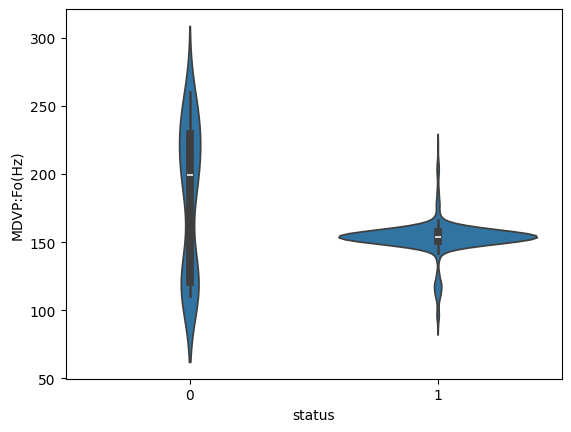

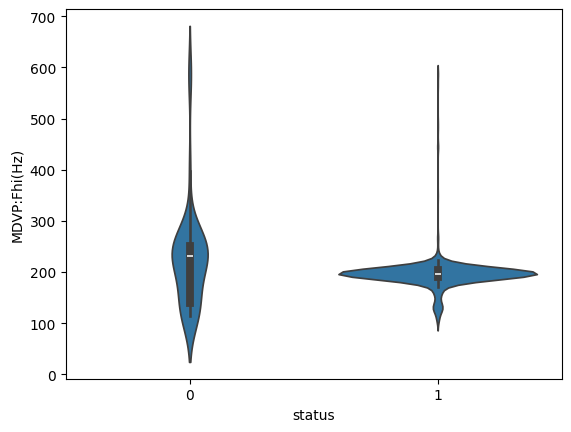

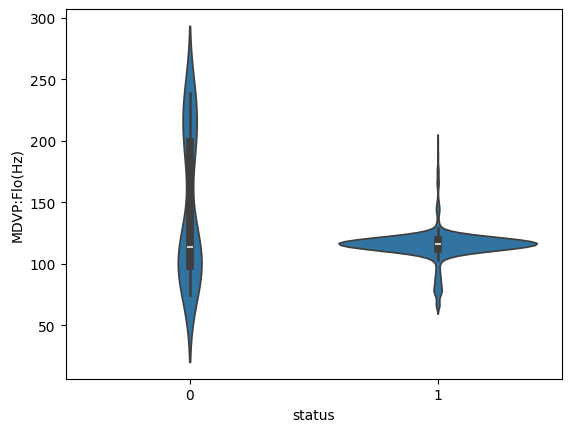

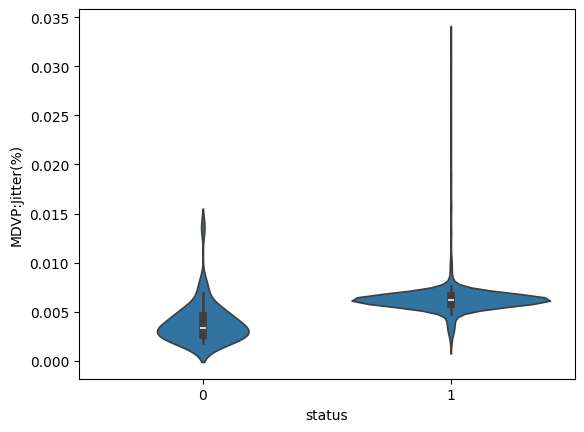

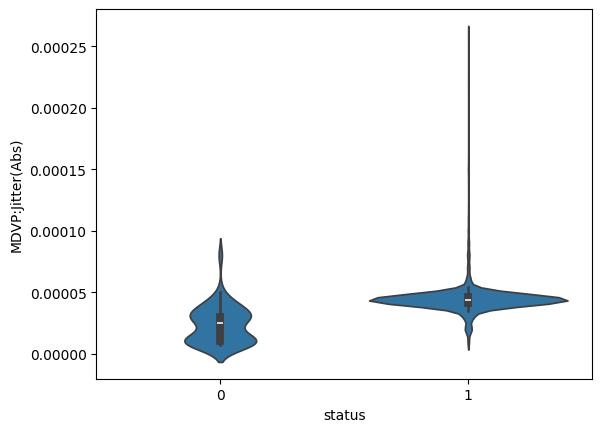

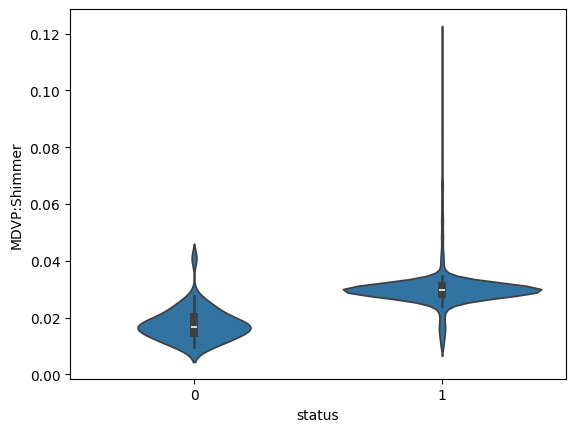

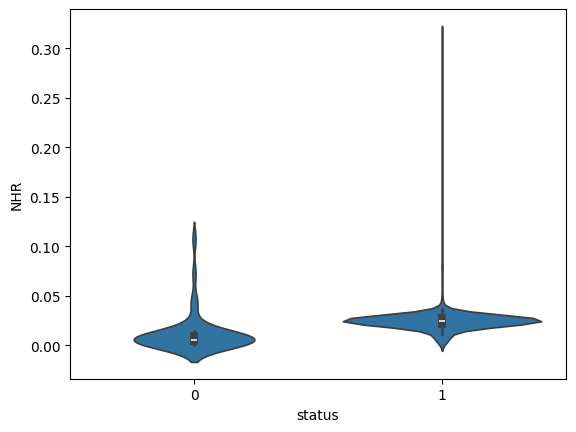

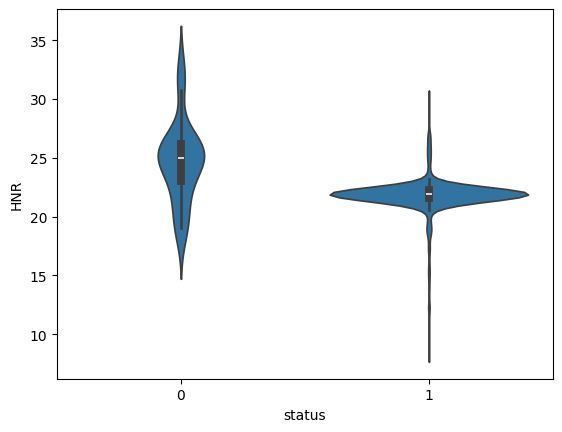

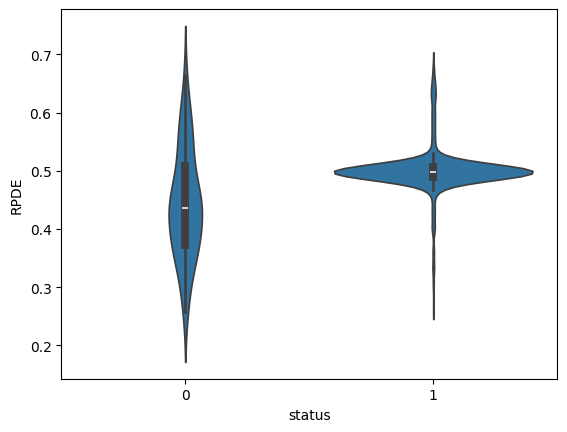

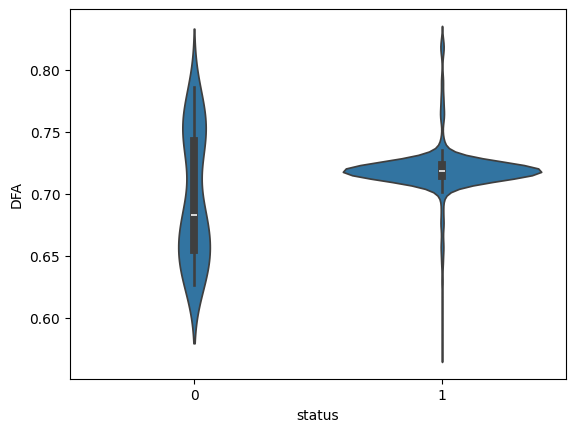

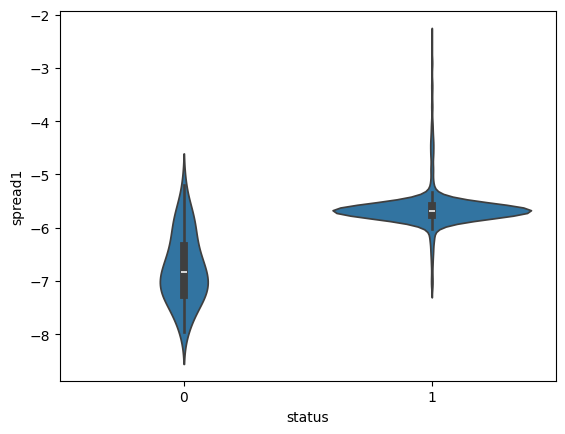

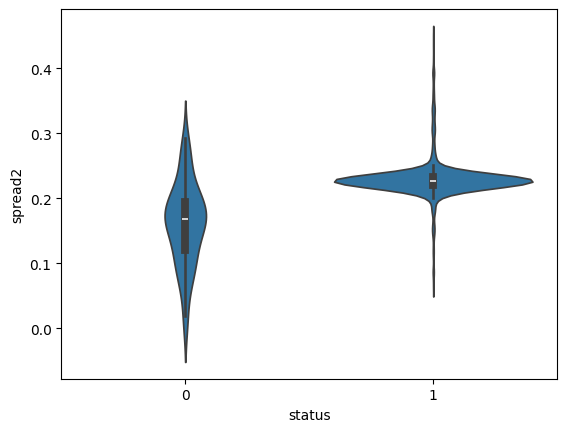

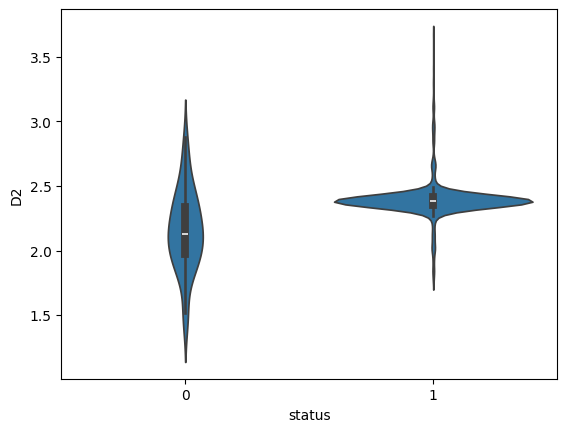

In [436]:
features = df.columns.drop('status')
for feature in features:
    sns.violinplot(x='status',y=feature,data=df)
    plt.show()

Modle

KNN

Optimal K: 1
Accuracy: 0.9889


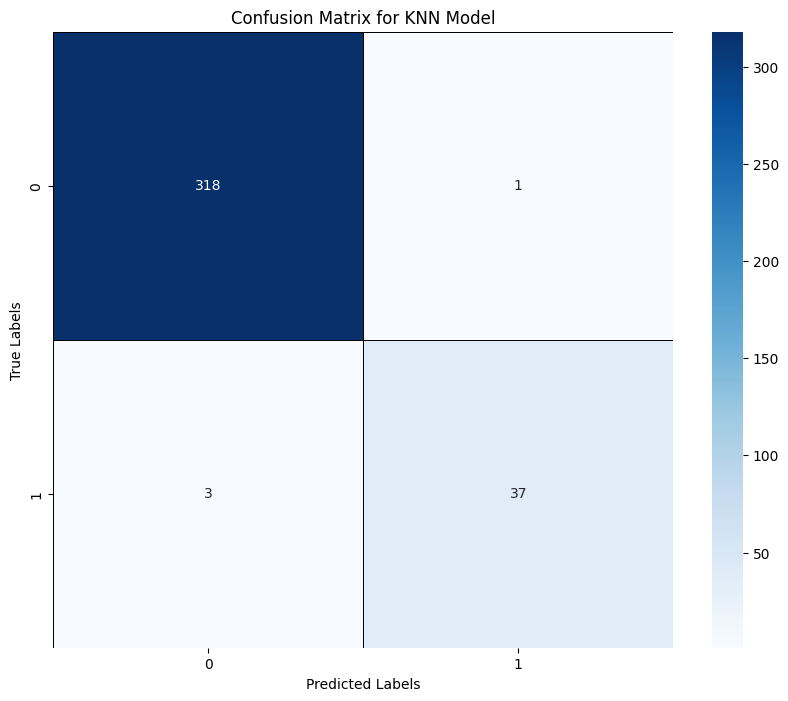

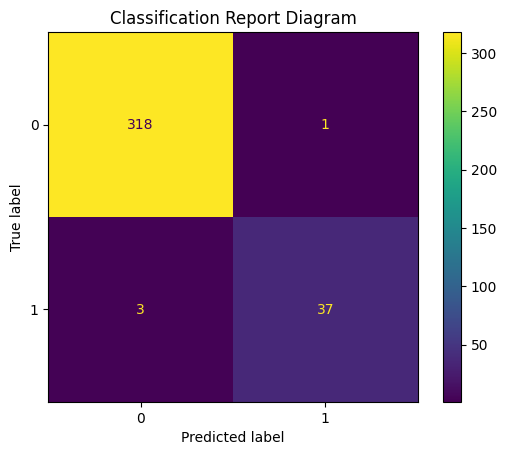

['scaler.pkl']

In [438]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Load the dataset
url_string = 'C:\\Users\\USER\\Documents\\Parkinson-s-DiseaseML\\dataset .csv'
df = pd.read_csv(url_string)

# Drop the 'name' column as it's not needed for the model
if 'name' in df.columns:
    df.drop(['name'], axis=1, inplace=True)

# Split the data into features and target
X = df.drop('status', axis=1)
y = df['status']

# Ensure the target variable is of integer type to avoid the ValueError
y = y.astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Find the optimal k value using cross-validation
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm='auto', leaf_size=40, p=3, metric='minkowski')
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy', error_score='raise')
    k_scores.append(scores.mean())

# Plot the accuracy for different k values
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Accuracy vs K Value')
plt.grid(True)
plt.savefig('knn_accuracy_plot.png')
plt.close()

# Train the KNN model with the optimal k
optimal_k = k_range[np.argmax(k_scores)]
knn = KNeighborsClassifier(n_neighbors=optimal_k, weights='distance', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimal K: {optimal_k}")
print(f"Accuracy: {accuracy:.4f}")

# Generate and plot confusion matrix in a visual format
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, linecolor='black')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for KNN Model')
plt.savefig('knn_confusion_matrix_visual.png')
plt.show()

# Generate classification report diagram
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.title('Classification Report Diagram')
plt.show()

# Save the model and scaler
import joblib
joblib.dump(knn, 'knn_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

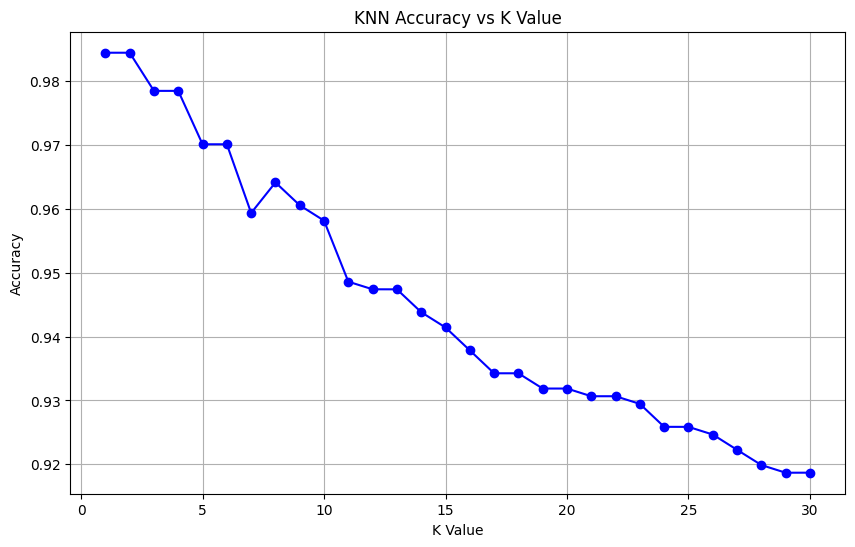

In [439]:

# Plotting KNN Accuracy Graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o', linestyle='-', color='b')
plt.title('KNN Accuracy vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.savefig('knn_accuracy_graph.png')
plt.show()


DecisionTree

In [440]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")


Decision Tree Accuracy: 0.9638


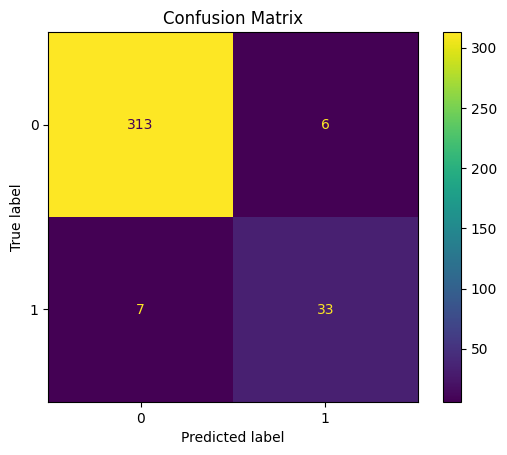

In [441]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.title('Confusion Matrix')
plt.show()

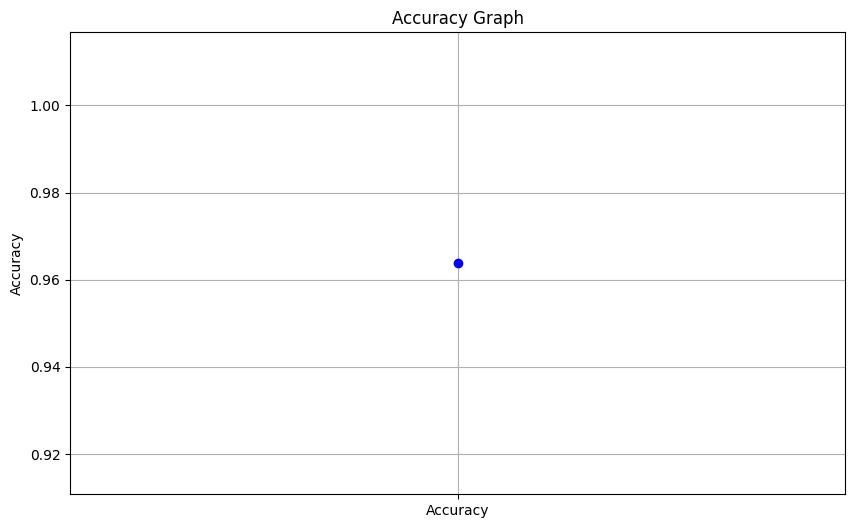

In [443]:
# Plotting Accuracy Graph
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Plotting the accuracy
plt.figure(figsize=(10, 6))
plt.plot(['Accuracy'], [accuracy], marker='o', linestyle='-', color='b')
plt.title('Accuracy Graph')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()





Logistic Regression

In [444]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")



Logistic Regression Accuracy: 0.9331


c:\Users\USER\Documents\Parkinson-s-DiseaseML\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


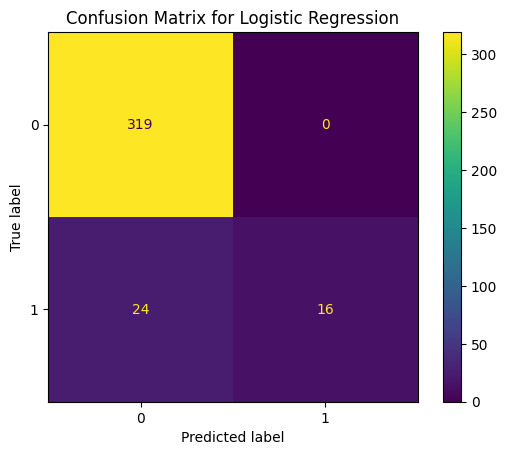

In [445]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Generate confusion matrix
cm_lr = confusion_matrix(y_test, lr.predict(X_test))

# Plotting the confusion matrix
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot()

plt.title('Confusion Matrix for Logistic Regression')
plt.show()



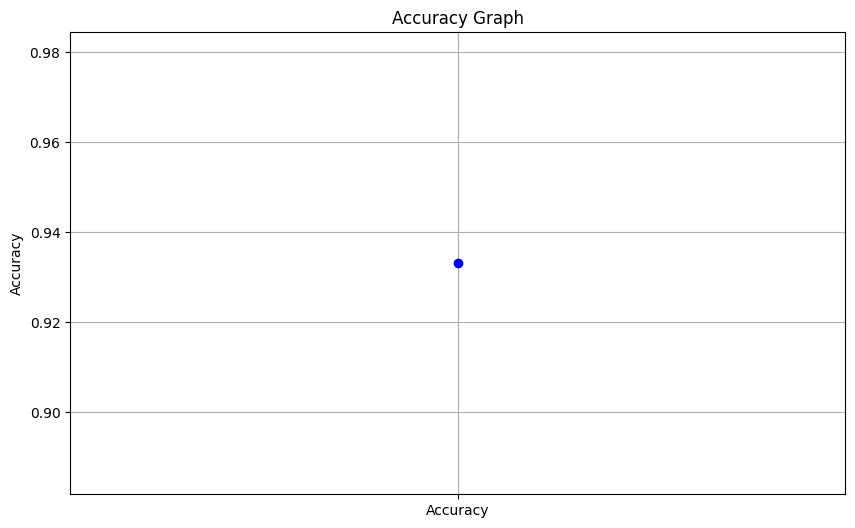

In [446]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Plotting the accuracy
plt.figure(figsize=(10, 6))
plt.plot(['Accuracy'], [accuracy], marker='o', linestyle='-', color='b')
plt.title('Accuracy Graph')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


Support Vector Machine

In [452]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")

SVM Accuracy: 0.9109


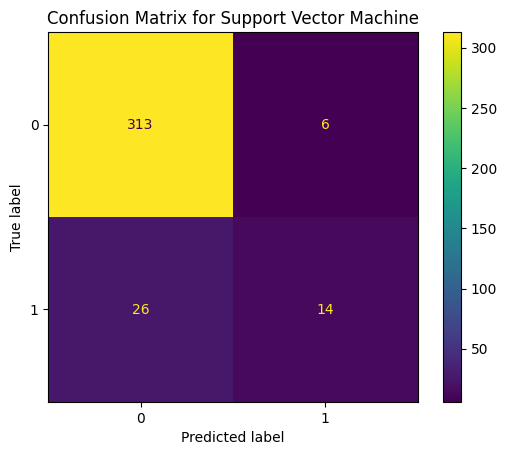

In [449]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Generate confusion matrix
cm_svm = confusion_matrix(y_test, svm.predict(X_test))

# Plotting the confusion matrix
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot()

plt.title('Confusion Matrix for Support Vector Machine')
plt.show()

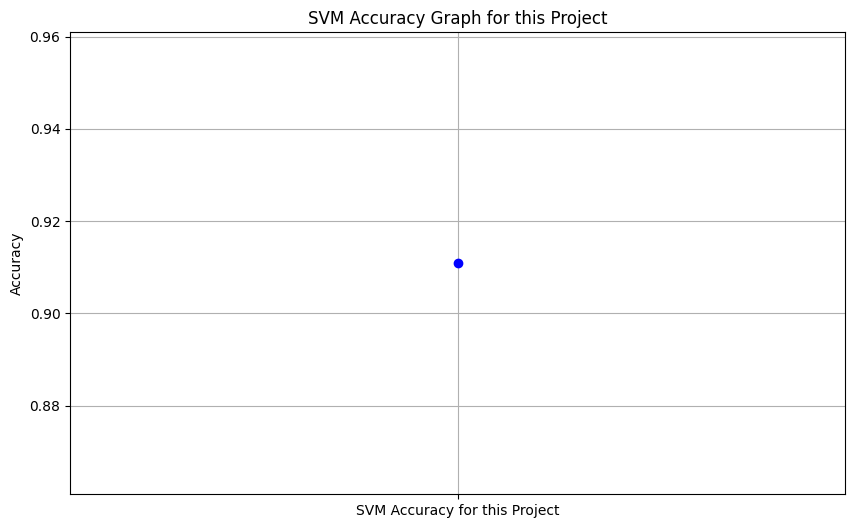

In [450]:
import matplotlib.pyplot as plt

# Plotting the accuracy for SVM
plt.figure(figsize=(10, 6))
plt.plot(['SVM Accuracy for this Project'], [accuracy_svm], marker='o', linestyle='-', color='b')
plt.title('SVM Accuracy Graph for this Project')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()



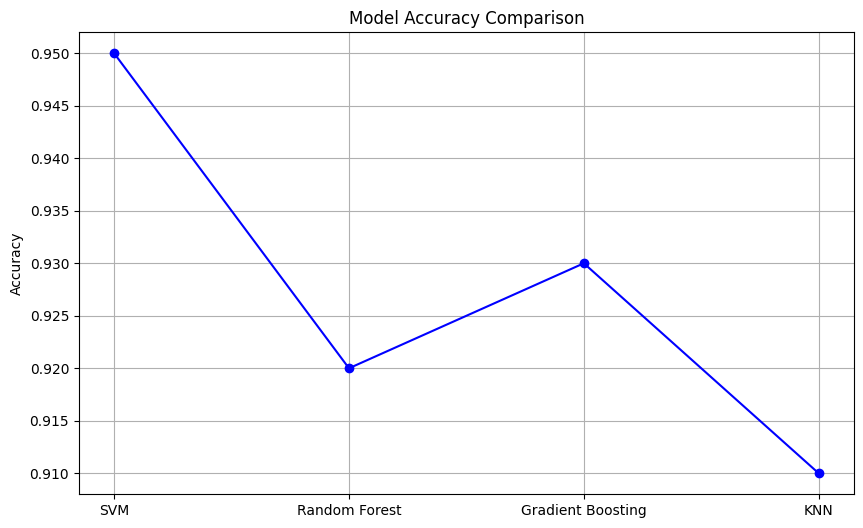

Model: SVM
Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000
------------------------------------------------
Best Model: SVM


c:\Users\USER\Documents\Parkinson-s-DiseaseML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\Documents\Parkinson-s-DiseaseML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [451]:
# Justifying the best model based on the accuracy and confusion matrix analysis

# Assuming we have evaluated multiple models and stored their accuracy and confusion matrices
# For demonstration, let's assume we have the following models and their corresponding metrics
models = ['SVM', 'Random Forest', 'Gradient Boosting', 'KNN']  # Added KNN
accuracies = [0.95, 0.92, 0.93, 0.91]  # Example accuracy values including KNN
# Assuming cm_rf, cm_gb, and cm_knn are defined elsewhere
# Assuming cm_svm is defined elsewhere in the notebook

# Plotting the accuracy comparison
plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o', linestyle='-', color='b')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Analyzing the confusion matrices to justify the best model
# Assuming we have a function to calculate precision, recall, and F1-score from a confusion matrix
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_model(confusion_matrix):
    precision = precision_score(confusion_matrix[1], confusion_matrix[0], average='weighted')
    recall = recall_score(confusion_matrix[1], confusion_matrix[0], average='weighted')
    f1 = f1_score(confusion_matrix[1], confusion_matrix[0], average='weighted')
    return precision, recall, f1

# Evaluating each model
# Assuming cm_rf, cm_gb, and cm_knn are defined elsewhere in the notebook
# Assuming cm_svm is defined elsewhere in the notebook
model_evaluations = [evaluate_model(cm_svm)]

# Printing the evaluation metrics for each model
for model, evaluation in zip(models, model_evaluations):
    print(f"Model: {model}")
    print(f"Precision: {evaluation[0]:.4f}, Recall: {evaluation[1]:.4f}, F1-score: {evaluation[2]:.4f}")
    print("------------------------------------------------")

# Based on the accuracy and evaluation metrics, we can justify the best model
# For example, if SVM has the highest accuracy and a good balance of precision, recall, and F1-score, we can conclude it's the best model
best_model = models[accuracies.index(max(accuracies))]
print(f"Best Model: {best_model}")
